# One way ANOVA

## Challenge 6.2: Is the performance of students affected by the teacher under whom they study?

The surveying agency wants to know whether the performance of students is affected by the teacher under whom they have studied. To verify the same, the agency chooses a school. It selects 3 teachers from the school and ask them to teach a particular subject to 3 different groups of students.

At the end of the course, the agency picks 6 students from each group and the students undergo a test.

The mark scored by the students in the test (out of 100) is noted. The marks are given below.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Data is imported to Python environment and the sample means were calculated.

In [2]:
test = pd.read_csv("data/test.csv")

In [3]:
display(test)

,Teacher,Mark
0,teacher1,90
1,teacher1,76
2,teacher1,65
3,teacher1,67
4,teacher1,73
5,teacher1,81
6,teacher2,81
7,teacher2,86
8,teacher2,89
9,teacher2,76


In [4]:
mean_teacher1 = test.loc[test["Teacher"]=='teacher1', 'Mark'].mean()
print('Average marks of students assigned to teacher1: {0:.2f}'.format(mean_teacher1))
mean_teacher2 = test.loc[test["Teacher"]=='teacher2', 'Mark'].mean()
print('Average marks of students assigned to teacher2: ', mean_teacher2)
mean_teacher3 = test.loc[test["Teacher"]=='teacher3', 'Mark'].mean()
print('Average marks of students assigned to teacher3: {0:.2f}'.format(mean_teacher3))

Average marks of students assigned to teacher1: 75.33
Average marks of students assigned to teacher2:  85.5
Average marks of students assigned to teacher3: 69.67


Box plot was plotted to visually represent the difference in the performance of the three groups. 

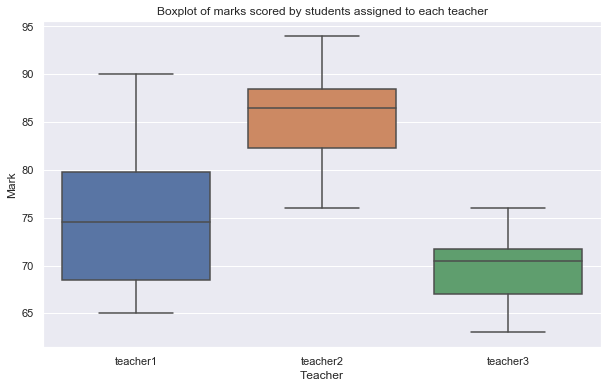

In [5]:
plt.figure(figsize=(10,6));
sns.boxplot(y = 'Mark', data = test, x = 'Teacher');
plt.title('Boxplot of marks scored by students assigned to each teacher');

From the Python code it is observed that there is a considerable difference between the three sample means. The box plot also shows a considerable difference between the median of mark scored by the students of the 3 groups. 

However, difference in sample means is not sufficient to conclude that there would be a difference in population means.

Let us find out whether these differences in sample mean is significant enough to conclude that there would be difference in population means as well. 

### Comparing more than two treatments

This challenge appears similar to the previous challenge where the agency compared the performance of two different schools using 2 sample t test.

However the difference is in the previous challenge the agency compared 2 different treatments and in this challenge there are 3 treatments to compare. 

The limitation of 2 sample t test is that it can compare only two treatments at a time. Thus when we have  more than two samples to compare, we need to perform multiple t tests.

For example if we have 3 samples i.e. sample 1, sample 2 and sample 3, we will have to perform 3 two sample t tests. 
- one between sample 1 and sample 2
- one between sample 2 and sample 3
- one between sample 3 and sample 1

The drawback of performing multiple t test are given below:
- __Cumbersome:__ While comparing more than 2 treatments by performing t test, one has to perform multiple t test based on the number of treatments being compared.
    For comparing n treatments one has to perform n(n-1)/2 no. of t tests. For example, in order to compare 5 different samples, one has to perform 5*4/2=10 independent t tests, which is cumbersome.
    
- __Increase in probability of Type 1 Error:__ Another drawback with performing multiple t tests is the increase in probability of type 1 error. If we perform one t test with 0.05 level of significance then it means there is 5% of probability of getting a type 1 error, which means the probability of the test being accurate is 95% or 0.95.

    If we conduct 3 independent 3 tests, the probability of the test producing correct result will be $(0.95)*(0.95)*(0.95) = 0.857$  
    
    The level of significance ($\alpha$) will be $1-0.857=0.143$
    
    Which means there is $14.3%$ probability of a type I error to occur which was just 5% in conducting a single t test. 
    
    From the above points it is clear that comparing more than 2 treatments by performing multiple t tests is not recommended. 

 



### Analysis of variance (ANOVA)

We have seen the problem associated with conducting multiple t tests for comparing means of more than 2 groups. Thus to compare the means of more than 2 groups we use another statistical inference technique called __An__alysis __o__f __Va__riance also known as __ANOVA__.

There are three kinds of analysis of variance that can be performed.
- One way ANOVA
- Two way ANOVA
- Multi way ANOVA

###  One way ANOVA (or, One way analysis of variance) 

The one-way analysis of variance (ANOVA) is used to determine whether there are any significant differences between the means of three or more independent (unrelated) groups.

We take samples from each group, compare the sample means and perform ANOVA to find out if there would be any significant differences in the population means of the groups.


### Steps to perform one way ANOVA

__Step 1:__ Define the Null and the alternate hypothesis.

__Step 2:__ Calculate various sum of square values 

__Step 3:__ Calculate Degrees of freedom of sum of squares 

__Step 4:__ Calculate the mean square values 

__Step 5:__ Calculate the F statistic `Fcalculated`

__Step 6:__ Find out the critical F statistic `Fcritical`

__Step 7:__ Compare Fcalculated and  Fcritical and state the conclusion. 

The surveying agency performs one way ANOVA to compare the performance of three teachers. Let us see how the surveying agency performs one way ANOVA.

#### Step 1: Defining hypothesis

![](8_1.PNG)

The Surveying agency defines the hypothesis as given below.

__Null Hypothesis ($H_0$):__ There is no difference in the performances of the three teachers. i.e. the population mean of mark scored by the 3 groups who has studied under the 3 teachers are the same.

$$ H_0: \mu_1 = \mu_2 = \mu_3 $$

__Alternate Hypothesis($H_a$):__ There is a difference between the performances of the 3 teachers i.e. the population mean of mark scored by the 3 groups are different.

$$ H_a: \mu_1 \neq \mu_2 \neq \mu_3 $$

The level of significance was chosen to be  0.05 by the agency.

#### Step 2: Calculation of sum of squares

To understand ANOVA we need to understand the concept of sum of squares. There are three types of sum of squares, that we will be discussing:
- Sum of squares (total) : denoted as SST
- Sum of squares (between) : denoted as SSB
- Sum of squares (within) : denoted as SSW

##### Sum of Squares Total (SST)

We have marks of 15 records i.e. mark scored by 15 students. If we calculate the mean of all the records and then calculate the sum of squared distance of the mean from each of the record, it is called __sum of squares total__.

$$SST = \sum_{i=1}^n(x_i - \bar{X})^2$$

n = total no. of records and   $\bar{X}$ = The over all mean

Following Python code is executed to calculate  Sum of Squares total (SST).

In [6]:
mean_overall = np.mean(test.Mark)
SST = np.sum((test.Mark - mean_overall)**2)
print('SST: {0:.2f}'.format(SST))

SST: 1504.50


Sum of square total was calculated to be 1504.5.

##### Sum of Squares Within (SSW)

For each sample, if we calculate the sample mean, find out the sum of squared distance of a sample mean from all the observations in that sample and add them up, it is called sum of squares within or SSW.

SSW is the measure of variability within groups. So if we have 3 independent groups SSW can be found as follows:

![](8_2.PNG)

We have 3 treatments/samples here i.e. three groups under the 3 teachers. The agency calculates SSW as follows:

![](8_3.PNG)



In [7]:
SSW1 = np.sum((test.loc[test.Teacher == 'teacher1', 'Mark'] - mean_teacher1)**2)
SSW2 = np.sum((test.loc[test.Teacher == 'teacher2', 'Mark'] - mean_teacher2)**2)
SSW3 = np.sum((test.loc[test.Teacher == 'teacher3', 'Mark'] - mean_teacher3)**2)
SSW = SSW1 + SSW2 + SSW3
print('SSW: {0:.2f}'.format(SSW))

SSW: 732.17


The sum of square with in was found to be 732.1667.

#### Sum of Squares Between (SSB)
Sum of squares between is the variability between samples. The sum of square between for a sample is calculated by multiplying number of observations in the sample with the squared difference of the sample mean and overall mean.

![](8_4.PNG)

The Agency calculates the sum of squares between as shown below:



In [8]:
SSB_teacher1 = len(test.loc[test.Teacher=='teacher1','Mark']) * ((mean_teacher1 - mean_overall)**2)
SSB_teacher2 = len(test.loc[test.Teacher=='teacher2','Mark']) * ((mean_teacher2 - mean_overall)**2)
SSB_teacher3 = len(test.loc[test.Teacher=='teacher3','Mark']) * ((mean_teacher3 - mean_overall)**2)
SSB = SSB_teacher1 + SSB_teacher2 + SSB_teacher3
print("SSB: {0:.2f}".format(SSB))

SSB: 772.33


#### Relationship between various sum of squares

We have calculated SST,SSW and SSB. The Python code below shows that sum of variability with in groups (SSW) and variability between groups (SSB) is equals to the total sum of squares (SST). Which suggests the total variability in a data is caused by the variability among different groups and the variability within the groups.

In [9]:
print("SSB: {0:.2f}".format(SSB))
print('SSW: {0:.2f}'.format(SSW))
print('SSW + SSB: {0:.2f}'.format(SSB+SSW))
print("SST: {0:.2f}".format(SST))

SSB: 772.33
SSW: 732.17
SSW + SSB: 1504.50
SST: 1504.50


![](8_5.PNG)

#### Step 3: Calculating degress of freedom of sum of squares

There is a degree of freedom is associated with each sum of squares. The following table gives the degrees of freedom associated with the 3 types of sum of squares that we discussed.

![](8_6.PNG)

As we have seen in the  table:
- DF_{SST}  = N-1
- DF_{SSW} = (n-1)k
- DF_{SSB}  = k-1

![](8_7.PNG)

The Agency calculates various degrees of freedoms as given below:

In [10]:
N = 18
k = 3
n = 6
df_total = N-1
df_between = k-1
df_within = k * (n-1)
print("df_total: ", df_total)
print("df_between: ", df_between)
print("df_between: ", df_within)

df_total:  17
df_between:  2
df_between:  15


#### Step 4: Calculating mean square values

Mean squares are the ratio of sum of squares and the corresponding degrees of freedom. Thus we can define 3 different kinds of mean squares as follows:

![](8_8.PNG)

The surveying agency finds out the mean square values as follows:


In [11]:
MST = SST/df_total
MSB = SSB/df_between
MSW = SSW/df_within
print("MSW: {0:.2f}".format(MST))
print("MSB: {0:.2f}".format(MSB))
print("MSW: {0:.2f}".format(MSW))

MSW: 88.50
MSB: 386.17
MSW: 48.81


#### Step 5: Calculating F statistic

Mean square values represent variances. In the sampling distribution of sample variance section we have seen that ratio of two sample variances taken from normally distributed populations has a F distribution. Thus ratio of mean square between groups (MSB) and mean square within groups(MSW) has F distribution.

Thus __F-statistic__ is nothing but the __ratio__ of mean square between groups (__MSB__) and the mean square within groups (__MSW__).

$$ F = \frac{MSB}{MSW}$$

> A higher F statistic (greater than 1) suggests that the variance in the data is more due to the variance between groups than the variance within groups, which suggests there is a significant effect of the treatments

> A lower F statistic (less than 1) suggests that the variance in the data is more due to the variance within groups than the variance between groups, which suggests there may not be a significant effect of the treatments.

Let us calculate the F statistic. The Python code is given below:



In [12]:
F_calculated = MSB/MSW
print("F calculated: {0:.3f}".format(F_calculated))

F calculated: 7.911


#### Step 6: Finding the critical F value

After calculating the F statistic, we need to find the critical F value according to the level of significance and the degrees of freedom associated with our observations.

The critical F statistic is a point in the F distribution curve, which encloses the area specified by the significance level to its right under the F distribution curve. 

For example, if we find the critical F value to be x for a significance level of 0.05, then any point on the F distribution curve that is __greater than x (or to the right of x)__, has a probability of less than 0.05 of being occurred. 

In hypothesis testing we reject a hypothesis if the probability of its occurrence is less than the significance level. The region which is to the right of the critical F value is called rejection region. The same is pictorially represented below.

![](8_9.PNG)


As F statistic is the ratio of two variances (mean squares), 2 degrees of freedom are associated with each F statistic. One being the degrees of freedom of the numerator (MSB) and other being that of the denominator (MSW).

The surveying agency has set the level of significance (α) as 0.05.

As already calculated, numerator is MSB which has 2 degrees of freedom and the denominator MSW has 12 degrees of freedom. So the agency calculates the critical F value corresponding to α=0.05, DF1=2 and DF2=15 using Python function f.ppf() as shown below:



In [13]:
from scipy.stats import f
F_critical = f.ppf(0.95, 2, 15)
print("F_critical: ", F_critical)

F_critical:  3.6823203436732412


#### Step 7: Comparing the F statistics and arriving at a conclusion

As discussed, any F statistic that is greater than the critical F statistic has a probability of occurrence which is less than the level of significance. 

Thus we can conclude that

![](8_10.PNG)

The surveying agency has found:

$F_{calculated}$ = 7.91145.  
$F_{critical}$ = 3.68232

As $F_{calculated}$  > $F_{critical}$ we can say that the $F_{calculated}$ falls in the rejection region, hence the Null hypothesis can be rejected at a significance level of 0.05.

Hence the agency accepts the alternate hypothesis that there is a significant difference in the performance of the 3 teachers.  

__Solution to Challenge 6.2:__ By performing one was ANOVA, the surveying agency concludes that performance of students is affected by the teachers under whom they study. 

#### Performing one-way ANOVA in Python using [f_oneway() function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In Python environment we can perform ANOVA by using function f_oneway() from scipy.stats module.

`f_oneway()` function takes the data frame containing the observations as input and calculates the F statistic. 

We will use the f_oneway() function on the data frame test which contains the mark of all the 18 students studied under the 3 different teachers. 

In [14]:
import scipy.stats as stats
result_anova = stats.f_oneway(test.loc[test.Teacher=='teacher1', 'Mark'],
                             test.loc[test.Teacher=='teacher2', 'Mark'],
                             test.loc[test.Teacher=='teacher3', 'Mark'])
print(result_anova)

F_onewayResult(statistic=7.911450034145229, pvalue=0.004509549994581455)


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('Mark ~Teacher', data = test).fit()
aov_table = sm.stats.anova_lm(results, typ = 2)  
aov_table

,sum_sq,df,F,PR(>F)
Teacher,772.333333,2.0,7.91145,0.00451
Residual,732.166667,15.0,NaN,NaN


In [16]:
aov_table = sm.stats.anova_lm(results, typ = 1)   # Use this type 1 anova
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Teacher,2.0,772.333333,386.166667,7.91145,0.00451
Residual,15.0,732.166667,48.811111,NaN,NaN


#### Challenge 6.3: Effect of multiple factors on performance of students

The surveying agency compared the performance of three teachers based on the mark scored by students who have studied under them by performing One way ANOVA. Here the __dependent variable mark is quantitative__ in nature and there is __only one independent variable__ i.e. teacher which is __categorical__ nature.

Now the agency wants to know if there are any other factors that affect the performance of students.  

The agency notices that out of the 18 students who are picked 9 are male and 9 are female. The agency is interested to find out whether there is a significant difference between the performance of male students and female students. 

If there is a significant difference between the performance of male and female students, the dependent variable mark is affected by two factors, i.e., teacher and gender. When there are __two factors__ that affect the population and both the factors are __categorical__ in nature, we have to perform __two way ANOVA__.  

The agency performs two way ANOVA to find out the combined effect of teacher and gender on the performance of students. 

##### Reference:
1. [statsmodels Python ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)
2. [Python for Data Science - Analysis of Variance (ANOVA)](https://pythonfordatascience.org/anova-python/)